# Libraries Needed

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch #used for legend
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler



# Loading The Dataset

In [58]:
data = pd.read_csv('train.csv')
df = data.copy()

# Basic Data Exploration

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
new_order = ['PassengerId','Name','Sex', 'Age', 'SibSp',
       'Parch','Pclass', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']
df = df[new_order]

In [62]:
df.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,3,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,3,373450,8.0500,NaN,S,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.describe()

,PassengerId,Age,SibSp,Parch,Pclass,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,2.308642,32.204208,0.383838
std,257.353842,14.526497,1.102743,0.806057,0.836071,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,2.000000,7.910400,0.000000
50%,446.000000,28.000000,0.000000,0.000000,3.000000,14.454200,0.000000
75%,668.500000,38.000000,1.000000,0.000000,3.000000,31.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,3.000000,512.329200,1.000000


In [65]:
df.isnull().sum()# check for missing values in the dataset

PassengerId      0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Pclass           0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

# Data Visualization

## Survival Count & Percentage

C:\Users\user\AppData\Local\Temp\ipykernel_11676\9333689.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=colors)


Text(0.5, 1.0, 'Count of Passengers by Survival Status')

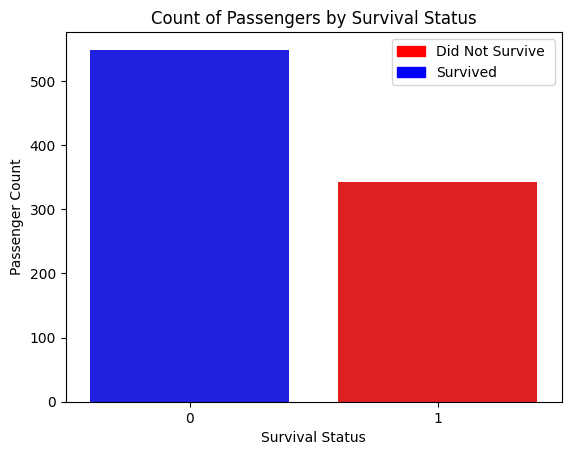

In [66]:
# Count the number of survived and not survived passengers
colors = ['blue', 'Red']

sns.countplot(x='Survived', data=df, palette=colors)

legend_labels = [Patch(color='red', label='Did Not Survive '),
                 Patch(color='blue', label='Survived')]
plt.legend(handles=legend_labels, loc='upper right')

plt.xlabel('Survival Status')
plt.ylabel('Passenger Count')
plt.title('Count of Passengers by Survival Status')



Text(0.5, 1.0, 'Survival Percentage of Passengers')

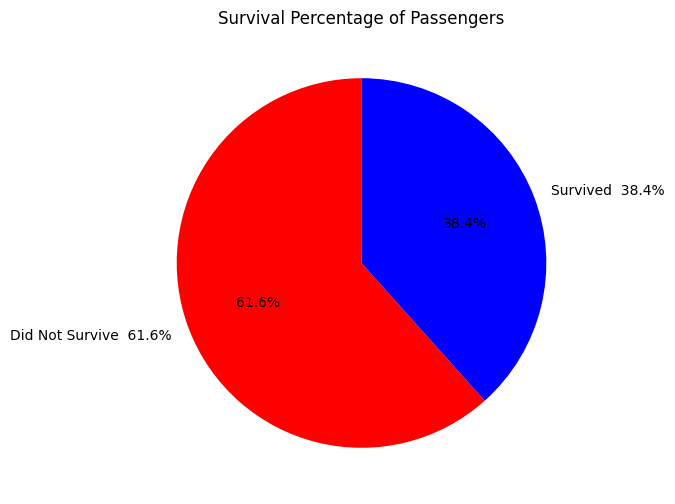

In [67]:
survival_counts = df['Survived'].value_counts(normalize=True) * 100

colors = ['red', 'blue']

plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=[f"Did Not Survive  {survival_counts[0]:.1f}%", 
                                f"Survived  {survival_counts[1]:.1f}%"],
        colors=colors, autopct= '%1.1f%%', startangle=90)

plt.title('Survival Percentage of Passengers')




## Gender Count & Percentage

In [68]:

gender_counts = df['Sex'].value_counts()

gender_counts

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11676\2374332832.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette=colors)


Text(0.5, 1.0, 'Gender Count of Passengers')

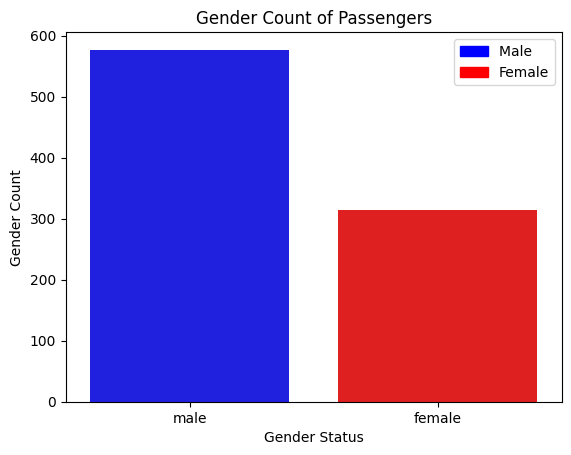

In [69]:
# Count the number of survived and not survived passengers
colors = ['blue', 'Red']

sns.countplot(x='Sex', data=df, palette=colors)

legend_labels = [Patch(color='blue', label='Male '),
                 Patch(color='red', label='Female')]
plt.legend(handles=legend_labels, loc='upper right')

plt.xlabel('Gender Status')
plt.ylabel('Gender Count')
plt.title('Gender Count of Passengers')

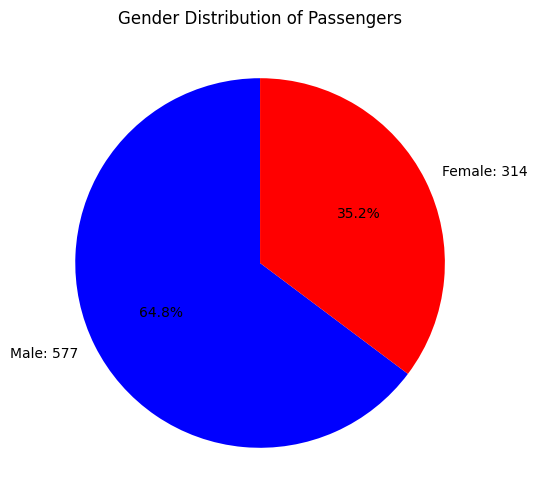

In [70]:
gender_counts = df['Sex'].value_counts()
colors = ['blue', 'red']

plt.figure(figsize=(6, 6))

plt.pie(gender_counts, 
        labels=[f"Male: {gender_counts['male']}", f"Female: {gender_counts['female']}"],
        colors=colors, 
        autopct='%1.1f%%',  
        startangle=90,  
        ) 

plt.title('Gender Distribution of Passengers')
plt.show()


## Age Distribution

In [71]:
df["Age"].isnull().sum()

np.int64(177)

In [72]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [73]:
df['Age'].min(), df['Age'].max()

(np.float64(0.42), np.float64(80.0))

we can see here that we have outliers in our dataset example (0.42,0.92,0.75) no one have this age so for that i will remove the outiler by creating boundaries between 1 and 100 and visualize again my data

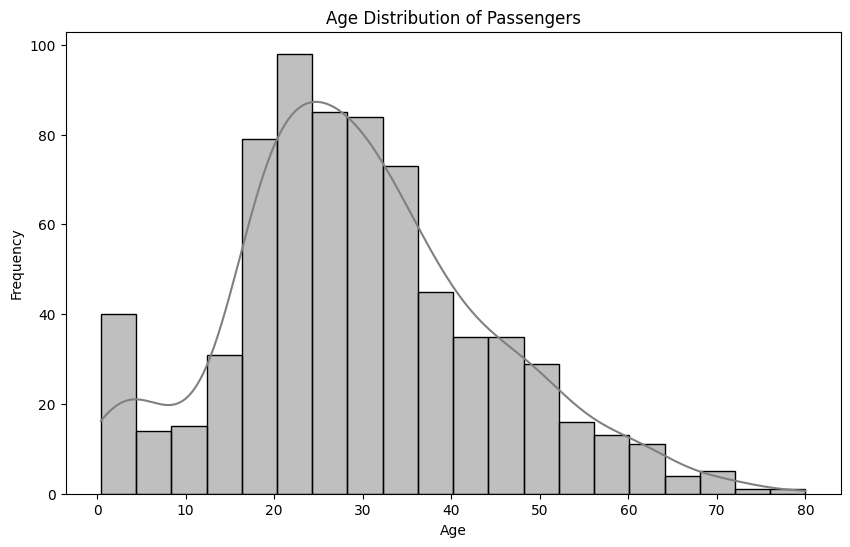

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='grey')  # 'kde' adds a Kernel Density Estimate 
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [75]:

Age_df = df[(df['Age'] >= 1) & (df['Age'] <= 100)]

# Create a checkpoint DataFrame (just in case i need it later)
df_Ageoutlier= Age_df.copy()



In [76]:
Age_df.isnull().sum()

PassengerId      0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Pclass           0
Ticket           0
Fare             0
Cabin          523
Embarked         2
Survived         0
dtype: int64

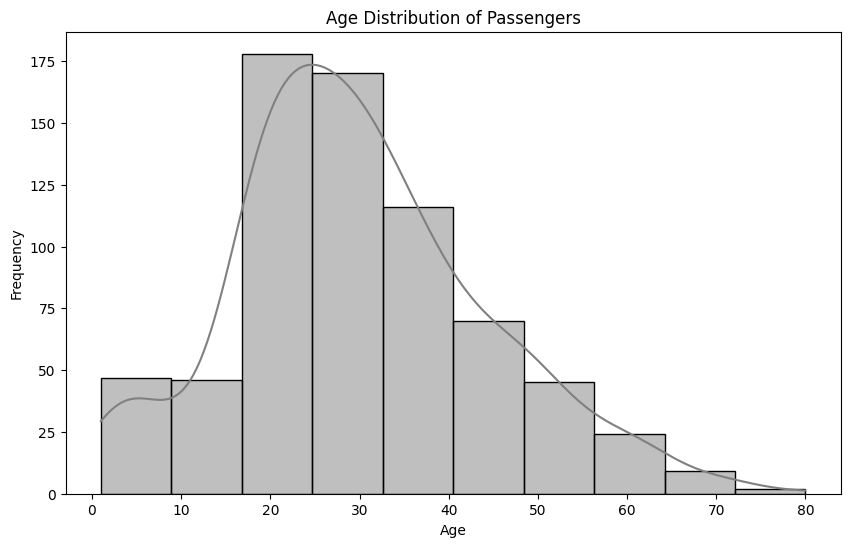

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(Age_df['Age'], kde=True, bins=10, color='grey')  # 'kde' adds a Kernel Density Estimate 
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [78]:
df_Ageoutlier.describe()

,PassengerId,Age,SibSp,Parch,Pclass,Fare,Survived
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,447.519095,29.985856,0.507779,0.422914,2.236209,34.669094,0.400283
std,258.860853,14.307794,0.930067,0.852050,0.839494,52.973650,0.490302
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,221.500000,21.000000,0.000000,0.000000,1.000000,8.050000,0.000000
50%,443.000000,28.000000,0.000000,0.000000,2.000000,15.550000,0.000000
75%,676.500000,38.500000,1.000000,1.000000,3.000000,33.760400,1.000000
max,891.000000,80.000000,5.000000,6.000000,3.000000,512.329200,1.000000


## Fare Distribution

<Axes: xlabel='Fare', ylabel='Count'>

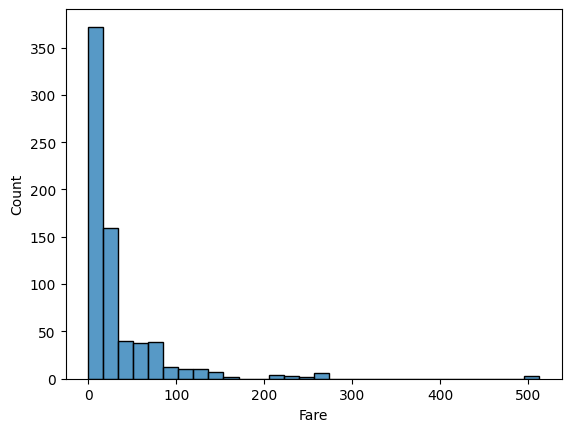

In [79]:
sns.histplot(df_Ageoutlier['Fare'], bins=30)

In [80]:
df_Ageoutlier['Fare'].describe()

count    707.000000
mean      34.669094
std       52.973650
min        0.000000
25%        8.050000
50%       15.550000
75%       33.760400
max      512.329200
Name: Fare, dtype: float64

From the distribution of the values in the above graph we can see that we have outliers in our data which basically don't represent the overall data distribution for that i will plot the outliers using boxplot after that i will use the IQR methode to remove the outliers from the fare feature.since 75 % of our data falls around 33%

<Axes: xlabel='Fare'>

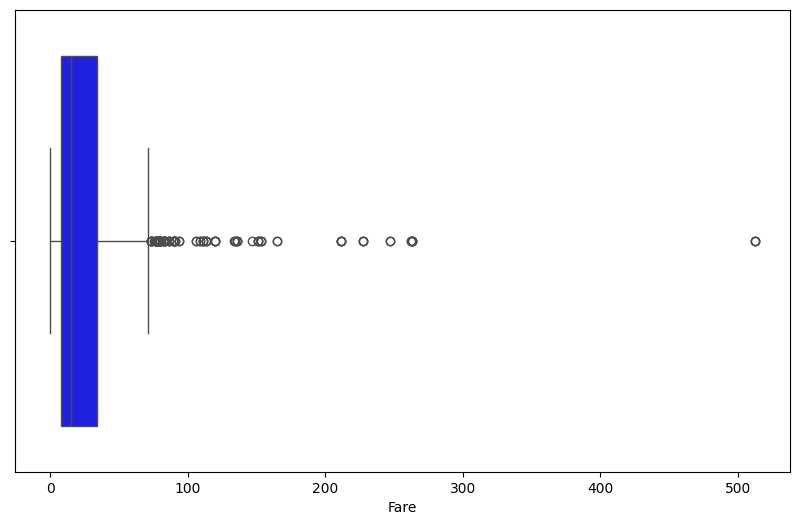

In [81]:

# Create a boxplot for 'Fare'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_Ageoutlier['Fare'], color='blue')





Managing outliers of fare then visualize using IQR Methode

In [82]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_Ageoutlier['Fare'].quantile(0.25)
Q3 = df_Ageoutlier['Fare'].quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fare_cleaned_df = df_Ageoutlier[(df_Ageoutlier['Fare'] >= lower_bound) & (df_Ageoutlier['Fare'] <= upper_bound)]



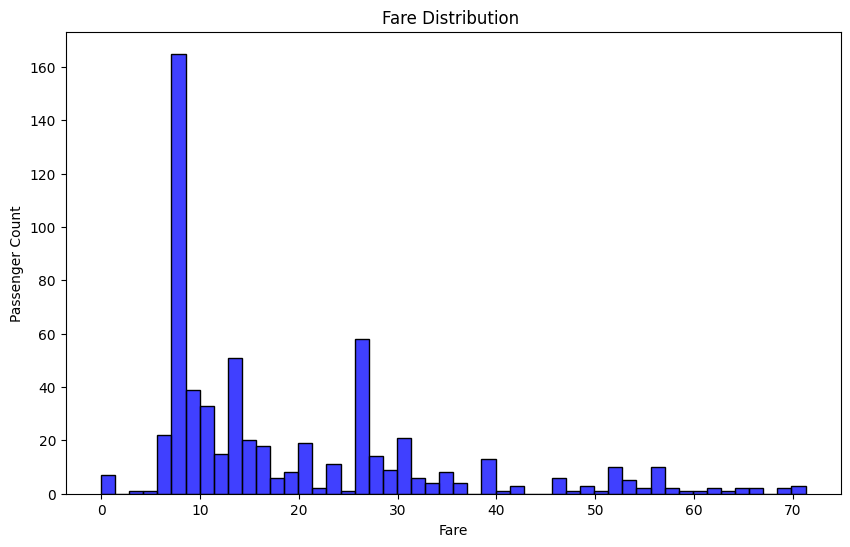

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(fare_cleaned_df['Fare'], bins=50, color='blue')
plt.title('Fare Distribution ')
plt.xlabel('Fare')
plt.ylabel('Passenger Count')
plt.show()

## Survival Distribution Betweem Genders

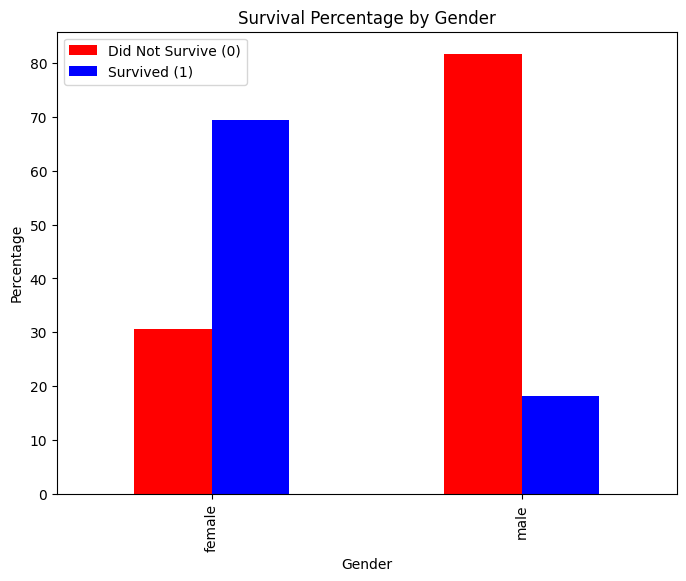

In [84]:

gender_survival_counts = pd.crosstab(fare_cleaned_df['Sex'], fare_cleaned_df['Survived'])


gender_survival_percentage = gender_survival_counts.div(gender_survival_counts.sum(axis=1), axis=0) * 100

gender_survival_percentage.plot(kind='bar', stacked=False, color=['red', 'blue'], figsize=(8,6))

plt.title('Survival Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(['Did Not Survive (0)', 'Survived (1)'])
plt.show()


## Survival Rate Between Ages

C:\Users\user\AppData\Local\Temp\ipykernel_11676\3156411373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare_cleaned_df['AgeGroup'] = pd.cut(fare_cleaned_df['Age'], bins=bins, labels=labels)# cut splits the countinuous variable into discrete bins
C:\Users\user\AppData\Local\Temp\ipykernel_11676\3156411373.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = fare_cleaned_df.groupby('AgeGroup')['Survived'].mean() * 100 # Calculate survival rate by age group


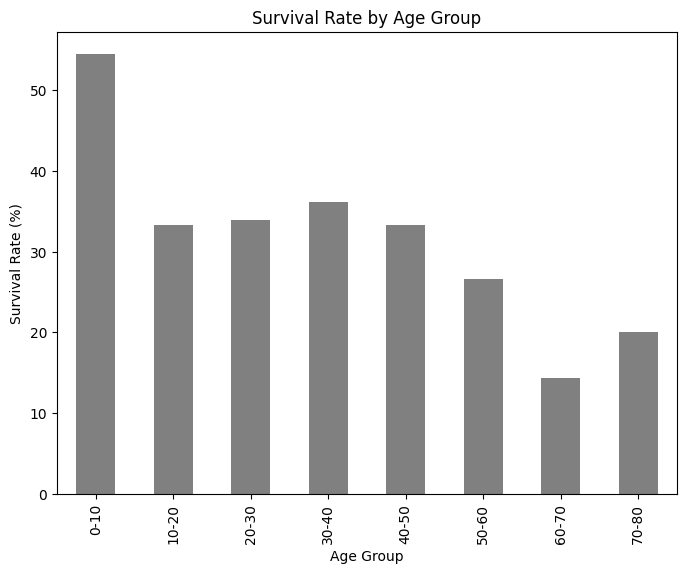

In [85]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
fare_cleaned_df['AgeGroup'] = pd.cut(fare_cleaned_df['Age'], bins=bins, labels=labels)# cut splits the countinuous variable into discrete bins


age_group_survival = fare_cleaned_df.groupby('AgeGroup')['Survived'].mean() * 100 # Calculate survival rate by age group

age_group_survival.plot(kind='bar', color='grey', figsize=(8,6))
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()


Here we can see what age group may have more chances to survive and the data shows that small and mid ages have the best chances.
The small age have larger chance since going back to history for titanic During the sinking, there was a very clear “women and children first” policy for lifeboats.
That means:

Young children (especially under 10) were given priority when evacuating.

Females (of any age) also had a significantly higher chance of survival.

## Survival Rates With Respect to Pclass

In [86]:
fare_cleaned_df['Pclass'].unique()

array([3, 1, 2])

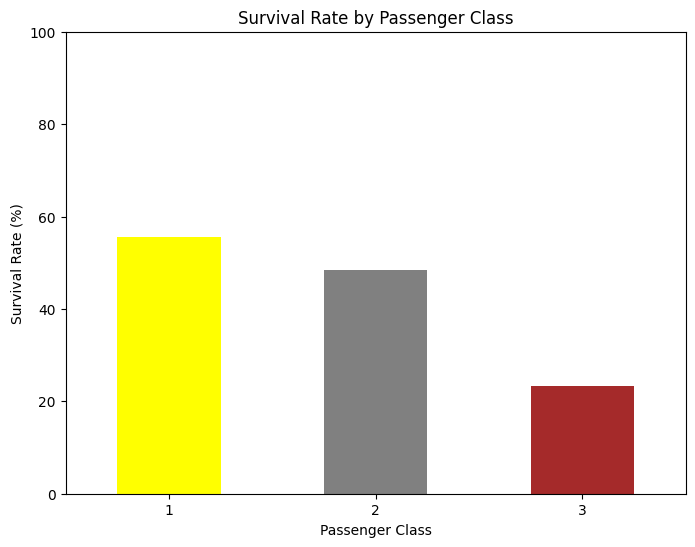

In [87]:

pclass_survival = fare_cleaned_df.groupby('Pclass')['Survived'].mean() * 100


pclass_survival.plot(kind='bar', color=['yellow', 'grey', 'brown'], figsize=(8,6))

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)

plt.show()


the results of this is logical sice if we go back to any boat design we can see that:
First class and Second class passengers had better access to lifeboats and were prioritized.
Third class passengers were physically lower in the ship, farther from the boat deck.





# Data Preprocessing

I've already done some of the data preprocessing in the age and fare features by removing some outliers now i will proceed in the othey steps

In [88]:
eda = fare_cleaned_df.copy() # creating checkpoint 

In [89]:
eda.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Cabin,Embarked,Survived,AgeGroup
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,3,A/5 21171,7.2500,NaN,S,0,20-30
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1,PC 17599,71.2833,C85,C,1,30-40
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3,STON/O2. 3101282,7.9250,NaN,S,1,20-30
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,113803,53.1000,C123,S,1,30-40
4,5,"Allen, Mr. William Henry",male,35.0,0,0,3,373450,8.0500,NaN,S,0,30-40


In [90]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  614 non-null    int64   
 1   Name         614 non-null    object  
 2   Sex          614 non-null    object  
 3   Age          614 non-null    float64 
 4   SibSp        614 non-null    int64   
 5   Parch        614 non-null    int64   
 6   Pclass       614 non-null    int64   
 7   Ticket       614 non-null    object  
 8   Fare         614 non-null    float64 
 9   Cabin        105 non-null    object  
 10  Embarked     614 non-null    object  
 11  Survived     614 non-null    int64   
 12  AgeGroup     614 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 63.3+ KB


### Dealing With Cabin Feature

In [91]:
eda["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'B30', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'C110', 'E101', 'D47', 'F2', 'C2',
       'B19', 'A7', 'C49', 'F4', 'B4', 'A31', 'D35', 'C87', 'B94', 'C118',
       'D', 'E36', 'B18', 'C124', 'T', 'E33', 'B35', 'E50', 'E10', 'C52',
       'E44', 'C104', 'C111', 'E38', 'E12', 'E63', 'B37', 'C30', 'E25',
       'D46', 'B38', 'B39', 'B22', 'A16', 'C101', 'A10', 'A20', 'D19',
       'D50', 'A23', 'B50', 'A26', 'E58', 'B71', 'B20', 'F G63', 'E24',
       'C90', 'C126', 'E8', 'D30', 'E121', 'E77', 'D6', 'D17', 'A36',
       'D28', 'E17', 'A24', 'B51 B53 B55', 'B42', 'C148'], dtype=object)

as part of my preprocessing steps i will drop the cabine feature since most of our data in it is missing and it will not show us any valuable insight since already we can see the same info from the ticket class since for sure first & second class cabinet will be on the top of the ship with a very beautifull view which means they will have more chancen from those that they took cabinet in the bottom of the ship.

In [92]:
eda = eda.drop('Cabin', axis=1)


### Dealing With Categorical Feature

I will apply one-hot encoding to the categorical variables that I believe will be valuable features in our study.

In [93]:
# One-hot encoding for 'Sex'
sex_dummies = pd.get_dummies(eda['Sex'], prefix='Sex', drop_first=True, dtype=int)

# One-hot encoding for 'Embarked'
embarked_dummies = pd.get_dummies(eda['Embarked'], prefix='Embarked', drop_first=True, dtype=int)

eda = pd.concat([eda, sex_dummies, embarked_dummies], axis=1)

eda.drop(['Sex', 'Embarked'], axis=1, inplace=True)

eda.head()


,PassengerId,Name,Age,SibSp,Parch,Pclass,Ticket,Fare,Survived,AgeGroup,Sex_male,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.0,1,0,3,A/5 21171,7.2500,0,20-30,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,1,PC 17599,71.2833,1,30-40,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,3,STON/O2. 3101282,7.9250,1,20-30,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,1,113803,53.1000,1,30-40,0,0,1
4,5,"Allen, Mr. William Henry",35.0,0,0,3,373450,8.0500,0,30-40,1,0,1


I will drop he age column and preprocess the age group since they both hold the same meaning and the age group will divide my data into different age categories which i will prepocess them using one hot encoding

In [94]:
eda.drop(["Age"],axis=1, inplace=True)

In [95]:
# One-hot encoding for 'Sex'
Agegroup_dummies = pd.get_dummies(eda['AgeGroup'], prefix='AgeGroup', drop_first=True, dtype=int)

eda = pd.concat([eda, Agegroup_dummies], axis=1)
eda.drop(['AgeGroup'], axis=1, inplace=True)
eda.head()


,PassengerId,Name,SibSp,Parch,Pclass,Ticket,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80
0,1,"Braund, Mr. Owen Harris",1,0,3,A/5 21171,7.2500,0,1,0,1,0,1,0,0,0,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,PC 17599,71.2833,1,0,0,0,0,0,1,0,0,0,0
2,3,"Heikkinen, Miss. Laina",0,0,3,STON/O2. 3101282,7.9250,1,0,0,1,0,1,0,0,0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,113803,53.1000,1,0,0,1,0,0,1,0,0,0,0
4,5,"Allen, Mr. William Henry",0,0,3,373450,8.0500,0,1,0,1,0,0,1,0,0,0,0


In [96]:
eda['Pclass'].unique()

array([3, 1, 2])

In [97]:
pclass_dummies = pd.get_dummies(eda['Pclass'], prefix='Pclass', dtype=int)
eda = pd.concat([eda, pclass_dummies], axis=1)
eda.drop('Pclass', axis=1, inplace=True)
eda

,PassengerId,Name,SibSp,Parch,Ticket,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80,Pclass_1,Pclass_2,Pclass_3
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,0,1,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,"Rice, Mrs. William (Margaret Norton)",0,5,382652,29.1250,0,0,1,0,0,0,1,0,0,0,0,0,0,1
886,887,"Montvila, Rev. Juozas",0,0,211536,13.0000,0,1,0,1,0,1,0,0,0,0,0,0,1,0
887,888,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,1,0,0,1,1,0,0,0,0,0,0,1,0,0
889,890,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1,1,0,0,0,1,0,0,0,0,0,1,0,0


In [98]:
eda.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80,Pclass_1,Pclass_2,Pclass_3
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4,5,"Allen, Mr. William Henry",0,0,373450,8.0500,0,1,0,1,0,0,1,0,0,0,0,0,0,1


### Scaling The Continous Feature
here we scale the fare feature since scaling wil help in  improving model convergence and interpretability



In [99]:
scaler = StandardScaler()
eda['Fare_scaled'] = scaler.fit_transform(eda[['Fare']])

# Drop the original Fare column
eda.drop('Fare', axis=1, inplace=True)

# Check the result
eda.head()

,PassengerId,Name,SibSp,Parch,Ticket,Survived,Sex_male,Embarked_Q,Embarked_S,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80,Pclass_1,Pclass_2,Pclass_3,Fare_scaled
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,1,0,1,0,1,0,0,0,0,0,0,0,1,-0.816432
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,1,0,0,0,0,0,1,0,0,0,0,1,0,0,3.525972
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,1,0,0,1,0,1,0,0,0,0,0,0,0,1,-0.770657
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,1,0,0,1,0,0,1,0,0,0,0,1,0,0,2.292875
4,5,"Allen, Mr. William Henry",0,0,373450,0,1,0,1,0,0,1,0,0,0,0,0,0,1,-0.762180


In [100]:
eda.columns

Index(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Survived',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'AgeGroup_10-20',
       'AgeGroup_20-30', 'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60',
       'AgeGroup_60-70', 'AgeGroup_70-80', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Fare_scaled'],
      dtype='object')

In [101]:
new_order = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket',
       'Fare_scaled','Sex_male', 'Embarked_Q', 'Embarked_S', 'AgeGroup_10-20',
       'AgeGroup_20-30', 'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60',
       'AgeGroup_60-70', 'AgeGroup_70-80', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Survived']

eda = eda[new_order]

In [102]:
preprocessed_data = eda.copy()

In [103]:
preprocessed_data.head()

,PassengerId,Name,SibSp,Parch,Ticket,Fare_scaled,Sex_male,Embarked_Q,Embarked_S,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80,Pclass_1,Pclass_2,Pclass_3,Survived
0,1,"Braund, Mr. Owen Harris",1,0,A/5 21171,-0.816432,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3.525972,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,-0.770657,0,0,1,0,1,0,0,0,0,0,0,0,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,2.292875,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,5,"Allen, Mr. William Henry",0,0,373450,-0.762180,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [104]:
preprocessed_data = preprocessed_data.to_csv('preprocessed_data.csv', index=False)

# Doing Preprocessing Steps the Test Data set

here i will write one function that will hold in it all the preprocessing steps i've done on the training data set

In [105]:
from sklearn.impute import SimpleImputer
test_df = pd.read_csv('test.csv')

def preprocess_test_data(test_df, scaler, train_columns):
    # Define bins and labels for AgeGroup
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
    
    # Create AgeGroup column from Age
    test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels)
    
    # One-hot encode 'Sex'
    sex_dummies = pd.get_dummies(test_df['Sex'], prefix='Sex', drop_first=True, dtype=int)
    embarked_dummies = pd.get_dummies(test_df['Embarked'], prefix='Embarked', drop_first=True, dtype=int)
    
    test_df = pd.concat([test_df, sex_dummies, embarked_dummies], axis=1)
    test_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
    test_df.drop(['Age'], axis=1, inplace=True)
    
    # One-hot encode 'AgeGroup'
    agegroup_dummies = pd.get_dummies(test_df['AgeGroup'], prefix='AgeGroup', drop_first=True, dtype=int)
    test_df = pd.concat([test_df, agegroup_dummies], axis=1)
    test_df.drop(['AgeGroup'], axis=1, inplace=True)
    
    # One-hot encode 'Pclass'
    pclass_dummies = pd.get_dummies(test_df['Pclass'], prefix='Pclass', dtype=int)
    test_df = pd.concat([test_df, pclass_dummies], axis=1)
    test_df.drop('Pclass', axis=1, inplace=True)
    
    # Scale 'Fare'
    test_df['Fare_scaled'] = scaler.transform(test_df[['Fare']])
    test_df.drop('Fare', axis=1, inplace=True)
    
    # Add missing columns
    for col in train_columns:
        if col not in test_df.columns:
            test_df[col] = 0
    
    # Reorder columns to match train data exactly
    test_df = test_df[train_columns]
    
    #  Handle missing values by filling with mean
    imputer = SimpleImputer(strategy='mean')
    test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)

    return test_df


In [106]:
train_columns = [ 'SibSp', 'Parch', 
       'Fare_scaled','Sex_male', 'Embarked_Q', 'Embarked_S', 'AgeGroup_10-20',
       'AgeGroup_20-30', 'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60',
       'AgeGroup_60-70', 'AgeGroup_70-80', 'Pclass_1', 'Pclass_2', 'Pclass_3']

In [107]:
processed_test_df = preprocess_test_data(test_df, scaler, train_columns)


In [108]:
processed_test_df.head()

,SibSp,Parch,Fare_scaled,Sex_male,Embarked_Q,Embarked_S,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,-0.777154,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,-0.833386,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,-0.651134,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,-0.720644,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,-0.474815,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [109]:
processed_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SibSp           418 non-null    float64
 1   Parch           418 non-null    float64
 2   Fare_scaled     418 non-null    float64
 3   Sex_male        418 non-null    float64
 4   Embarked_Q      418 non-null    float64
 5   Embarked_S      418 non-null    float64
 6   AgeGroup_10-20  418 non-null    float64
 7   AgeGroup_20-30  418 non-null    float64
 8   AgeGroup_30-40  418 non-null    float64
 9   AgeGroup_40-50  418 non-null    float64
 10  AgeGroup_50-60  418 non-null    float64
 11  AgeGroup_60-70  418 non-null    float64
 12  AgeGroup_70-80  418 non-null    float64
 13  Pclass_1        418 non-null    float64
 14  Pclass_2        418 non-null    float64
 15  Pclass_3        418 non-null    float64
dtypes: float64(16)
memory usage: 52.4 KB


# Machine Learning

### Choosing the Needed Features

I choosed the needed feature that will be the input for our models

In [110]:
data_ml = pd.read_csv('preprocessed_data.csv')
# data_ml.head()

In [111]:
data_ml.columns

Index(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare_scaled',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'AgeGroup_10-20',
       'AgeGroup_20-30', 'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60',
       'AgeGroup_60-70', 'AgeGroup_70-80', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Survived'],
      dtype='object')

I removed some features that will have no impact on my machine learning 

In [112]:
data_ml.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
data_ml.head()

,SibSp,Parch,Fare_scaled,Sex_male,Embarked_Q,Embarked_S,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80,Pclass_1,Pclass_2,Pclass_3,Survived
0,1,0,-0.816432,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1,1,0,3.525972,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,-0.770657,0,0,1,0,1,0,0,0,0,0,0,0,1,1
3,1,0,2.292875,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,0,0,-0.762180,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [113]:
X = data_ml.drop('Survived', axis=1)
y = data_ml['Survived']# this is the target variable


### Split Train Data set

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(491, 16) (123, 16)


In [115]:
print(y_train.shape, y_val.shape)

(491,) (123,)


### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_valid = log_reg.predict(X_val)

# Evaluate performance
print("Accuracy:", accuracy_score(y_val, y_pred_valid))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_valid))
print("Classification Report:\n", classification_report(y_val, y_pred_valid))



Accuracy: 0.7723577235772358
Confusion Matrix:
 [[74 15]
 [13 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        89
           1       0.58      0.62      0.60        34

    accuracy                           0.77       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.78      0.77      0.77       123



In [118]:
test_predictions = log_reg.predict(processed_test_df)



In [119]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('submission.csv', index=False)


### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)


In [121]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [122]:
rf_predictions = rf_model.predict(X_val)


In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_val, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_predictions))
print("Classification Report:\n", classification_report(y_val, rf_predictions))


Accuracy: 0.7317073170731707
Confusion Matrix:
 [[70 19]
 [14 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        89
           1       0.51      0.59      0.55        34

    accuracy                           0.73       123
   macro avg       0.67      0.69      0.68       123
weighted avg       0.74      0.73      0.74       123



In [124]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())


Cross-validated scores: [0.73737374 0.89795918 0.75510204 0.7755102  0.7244898 ]
Average CV accuracy: 0.7780869923727066


In [125]:
test_predictions = rf_model.predict(processed_test_df)

In [126]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('RandomForest.csv', index=False)

### XGBoost

In [127]:
from xgboost import XGBClassifier

In [128]:
# Create the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on your training data
xgb_model.fit(X_train, y_train)


c:\Users\user\Desktop\TITANIC Project\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [129]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

# Print cross-validation results
print("Cross-validated scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())


c:\Users\user\Desktop\TITANIC Project\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\user\Desktop\TITANIC Project\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\user\Desktop\TITANIC Project\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\user\Desktop\TITANIC Project\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\

Cross-validated scores: [0.70707071 0.87755102 0.73469388 0.76530612 0.73469388]
Average CV accuracy: 0.7638631210059781


In [130]:
# Predict on the validation set
y_pred = xgb_model.predict(X_val)

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.7560975609756098
Confusion Matrix:
 [[76 13]
 [17 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        89
           1       0.57      0.50      0.53        34

    accuracy                           0.76       123
   macro avg       0.69      0.68      0.68       123
weighted avg       0.75      0.76      0.75       123



In [131]:
test_predictions = xgb_model.predict(processed_test_df)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Export submission to CSV
submission.to_csv('xgboost_submission.csv', index=False)

Done By: Rami Assaf